In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso
from sklearn import metrics

### Data Processing

In [10]:
# importing dataset
df = pd.read_csv("car data.csv")

In [11]:
#checking the dataset
df.head(10)

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
5,vitara brezza,2018,9.25,9.83,2071,Diesel,Dealer,Manual,0
6,ciaz,2015,6.75,8.12,18796,Petrol,Dealer,Manual,0
7,s cross,2015,6.50,8.61,33429,Diesel,Dealer,Manual,0
8,ciaz,2016,8.75,8.89,20273,Diesel,Dealer,Manual,0
9,ciaz,2015,7.45,8.92,42367,Diesel,Dealer,Manual,0


In [12]:
df.shape

(301, 9)

In [14]:
#checking null values
df.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [15]:
#inspecting the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [18]:
#Checking categorical data
df['Fuel_Type'].value_counts()

Fuel_Type
Petrol    239
Diesel     60
CNG         2
Name: count, dtype: int64

In [19]:
df['Seller_Type'].value_counts()

Seller_Type
Dealer        195
Individual    106
Name: count, dtype: int64

In [20]:
df['Transmission'].value_counts()

Transmission
Manual       261
Automatic     40
Name: count, dtype: int64

In [21]:
# encoding the data
df_encoded = pd.get_dummies(df, columns=['Transmission', 'Seller_Type', 'Fuel_Type'])

In [22]:
df_encoded

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Owner,Transmission_Automatic,Transmission_Manual,Seller_Type_Dealer,Seller_Type_Individual,Fuel_Type_CNG,Fuel_Type_Diesel,Fuel_Type_Petrol
0,ritz,2014,3.35,5.59,27000,0,False,True,True,False,False,False,True
1,sx4,2013,4.75,9.54,43000,0,False,True,True,False,False,True,False
2,ciaz,2017,7.25,9.85,6900,0,False,True,True,False,False,False,True
3,wagon r,2011,2.85,4.15,5200,0,False,True,True,False,False,False,True
4,swift,2014,4.60,6.87,42450,0,False,True,True,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,0,False,True,True,False,False,True,False
297,brio,2015,4.00,5.90,60000,0,False,True,True,False,False,False,True
298,city,2009,3.35,11.00,87934,0,False,True,True,False,False,False,True
299,city,2017,11.50,12.50,9000,0,False,True,True,False,False,True,False


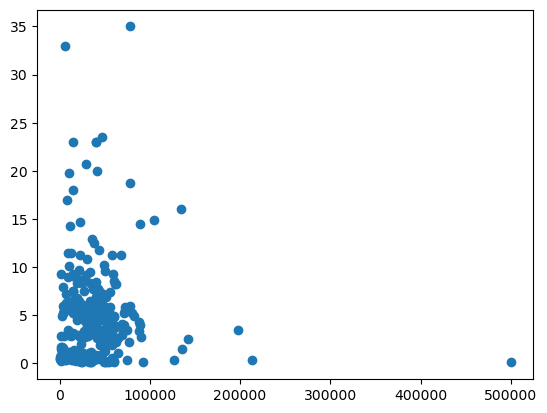

In [23]:
plt.scatter(df['Kms_Driven'] ,df['Selling_Price'])
plt.show()

In [26]:
from sklearn.preprocessing import StandardScaler

# Assuming df is your DataFrame
scaler = StandardScaler()
df_encoded[['Kms_Driven', 'Present_Price']] = scaler.fit_transform(df_encoded[['Kms_Driven', 'Present_Price']])

In [27]:
df_encoded

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Owner,Transmission_Automatic,Transmission_Manual,Seller_Type_Dealer,Seller_Type_Individual,Fuel_Type_CNG,Fuel_Type_Diesel,Fuel_Type_Petrol,Pesent_Price
0,ritz,2014,3.35,-0.236215,-0.256224,0,False,True,True,False,False,False,True,-0.236215
1,sx4,2013,4.75,0.221505,0.155911,0,False,True,True,False,False,True,False,0.221505
2,ciaz,2017,7.25,0.257427,-0.773969,0,False,True,True,False,False,False,True,0.257427
3,wagon r,2011,2.85,-0.403079,-0.817758,0,False,True,True,False,False,False,True,-0.403079
4,swift,2014,4.60,-0.087890,0.141743,0,False,True,True,False,False,True,False,-0.087890
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,0.460214,-0.076225,0,False,True,True,False,False,True,False,0.460214
297,brio,2015,4.00,-0.200292,0.593804,0,False,True,True,False,False,False,True,-0.200292
298,city,2009,3.35,0.390687,1.313340,0,False,True,True,False,False,False,True,0.390687
299,city,2017,11.50,0.564504,-0.719876,0,False,True,True,False,False,True,False,0.564504


In [28]:
df_encoded = df_encoded.drop(['Pesent_Price'], axis=True)

In [29]:
df_encoded

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Owner,Transmission_Automatic,Transmission_Manual,Seller_Type_Dealer,Seller_Type_Individual,Fuel_Type_CNG,Fuel_Type_Diesel,Fuel_Type_Petrol
0,ritz,2014,3.35,-0.236215,-0.256224,0,False,True,True,False,False,False,True
1,sx4,2013,4.75,0.221505,0.155911,0,False,True,True,False,False,True,False
2,ciaz,2017,7.25,0.257427,-0.773969,0,False,True,True,False,False,False,True
3,wagon r,2011,2.85,-0.403079,-0.817758,0,False,True,True,False,False,False,True
4,swift,2014,4.60,-0.087890,0.141743,0,False,True,True,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,0.460214,-0.076225,0,False,True,True,False,False,True,False
297,brio,2015,4.00,-0.200292,0.593804,0,False,True,True,False,False,False,True
298,city,2009,3.35,0.390687,1.313340,0,False,True,True,False,False,False,True
299,city,2017,11.50,0.564504,-0.719876,0,False,True,True,False,False,True,False


In [30]:
df_encoded['Car_Name'].value_counts()

Car_Name
city                        26
corolla altis               16
verna                       14
fortuner                    11
brio                        10
                            ..
Honda CB Trigger             1
Yamaha FZ S                  1
Bajaj Pulsar 135 LS          1
Activa 4g                    1
Bajaj Avenger Street 220     1
Name: count, Length: 98, dtype: int64

In [31]:
current_year = 2024
df_encoded['car_age'] = current_year - df_encoded['Year']
df_encoded.drop('Year', axis=True)

,Car_Name,Selling_Price,Present_Price,Kms_Driven,Owner,Transmission_Automatic,Transmission_Manual,Seller_Type_Dealer,Seller_Type_Individual,Fuel_Type_CNG,Fuel_Type_Diesel,Fuel_Type_Petrol,car_age
0,ritz,3.35,-0.236215,-0.256224,0,False,True,True,False,False,False,True,10
1,sx4,4.75,0.221505,0.155911,0,False,True,True,False,False,True,False,11
2,ciaz,7.25,0.257427,-0.773969,0,False,True,True,False,False,False,True,7
3,wagon r,2.85,-0.403079,-0.817758,0,False,True,True,False,False,False,True,13
4,swift,4.60,-0.087890,0.141743,0,False,True,True,False,False,True,False,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...
296,city,9.50,0.460214,-0.076225,0,False,True,True,False,False,True,False,8
297,brio,4.00,-0.200292,0.593804,0,False,True,True,False,False,False,True,9
298,city,3.35,0.390687,1.313340,0,False,True,True,False,False,False,True,15
299,city,11.50,0.564504,-0.719876,0,False,True,True,False,False,True,False,7


## Splitting dataset into training and testing

In [32]:
X = df_encoded.drop(['Car_Name', 'Selling_Price'], axis=1)
Y = df_encoded['Selling_Price']

In [33]:
X

,Year,Present_Price,Kms_Driven,Owner,Transmission_Automatic,Transmission_Manual,Seller_Type_Dealer,Seller_Type_Individual,Fuel_Type_CNG,Fuel_Type_Diesel,Fuel_Type_Petrol,car_age
0,2014,-0.236215,-0.256224,0,False,True,True,False,False,False,True,10
1,2013,0.221505,0.155911,0,False,True,True,False,False,True,False,11
2,2017,0.257427,-0.773969,0,False,True,True,False,False,False,True,7
3,2011,-0.403079,-0.817758,0,False,True,True,False,False,False,True,13
4,2014,-0.087890,0.141743,0,False,True,True,False,False,True,False,10
...,...,...,...,...,...,...,...,...,...,...,...,...
296,2016,0.460214,-0.076225,0,False,True,True,False,False,True,False,8
297,2015,-0.200292,0.593804,0,False,True,True,False,False,False,True,9
298,2009,0.390687,1.313340,0,False,True,True,False,False,False,True,15
299,2017,0.564504,-0.719876,0,False,True,True,False,False,True,False,7


In [35]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.1, random_state=42)

In [39]:
print(x_train.shape)
print(x_test.shape)
print(y_test.shape, y_train.shape)

(270, 12)
(31, 12)
(31,) (270,)


## Model building

In [40]:
reg = LinearRegression()

In [41]:
reg.fit(x_train, y_train)

LinearRegression()

## Model Evaluation

In [42]:
#Prediction on tarining data
training_pred = reg.predict(x_train)

In [43]:
# R squared error
error_score = metrics.r2_score(y_train, training_pred)
error_score

0.8854883936967941

## Visualize actual prices and predicted prices

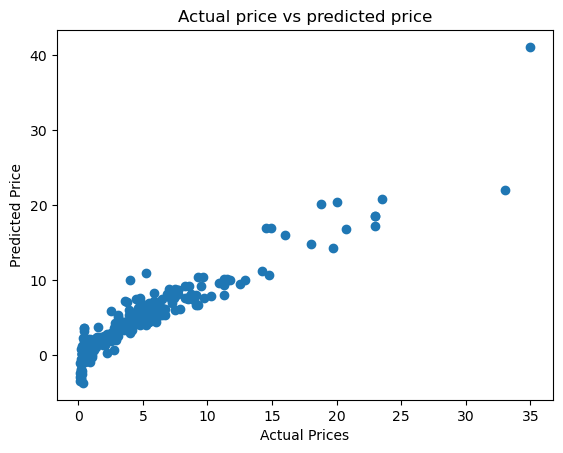

In [44]:
plt.scatter(y_train, training_pred)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Price")
plt.title("Actual price vs predicted price")
plt.show()

## Predict on test data

In [45]:
test_pred = reg.predict(x_test)

In [46]:
error = metrics.r2_score(y_test, test_pred)
error

0.82126649204723

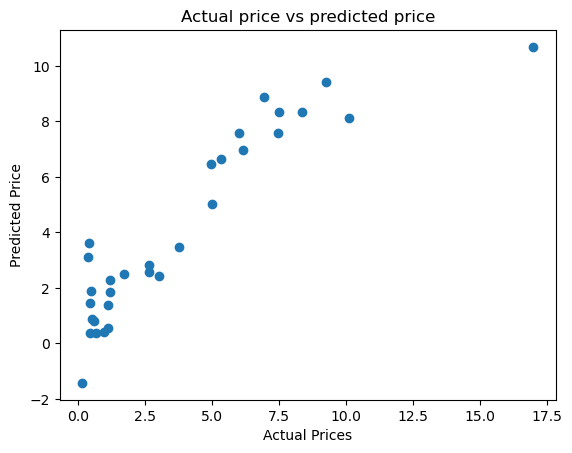

In [47]:
plt.scatter(y_test, test_pred)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Price")
plt.title("Actual price vs predicted price")
plt.show()

### Lasso Regression

In [48]:
lasso_reg = Lasso()

In [49]:
lasso_reg.fit(x_train, y_train)

Lasso()

In [50]:
training_pred = lasso_reg.predict(x_train)

In [53]:
Lasso_error = metrics.r2_score(y_train, training_pred)
Lasso_error

0.8094339010618415

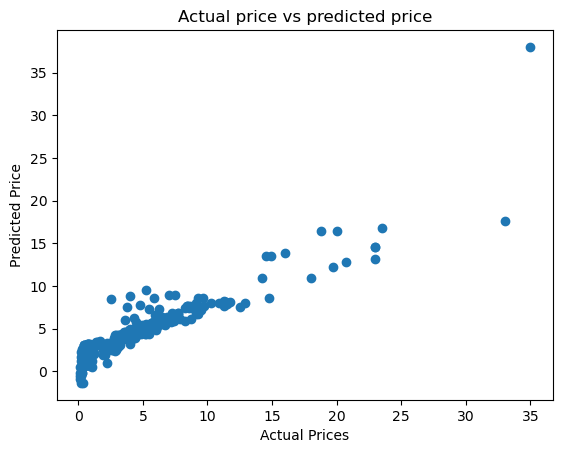

In [54]:
plt.scatter(y_train, training_pred)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Price")
plt.title("Actual price vs predicted price")
plt.show()

In [55]:
test_pred = lasso_reg.predict(x_test)

In [56]:
lasso_error_score = metrics.r2_score(y_test,test_pred)
lasso_error_score

0.7543744541254443